In [1]:
import os

In [2]:
os.chdir(r"E:\Course\Deep Learning Computer Vision™ CNN, OpenCV, YOLO, SSD & GANs\15. Transfer Learning and Fine Tuning Build a Flower and Monkey Breed Classifier\monkey_breed")

In [3]:
os.listdir()

['train', 'validation']

In [4]:
train = os.getcwd()+'\\'+os.listdir()[0]
validation = os.getcwd()+'\\'+os.listdir()[1]

In [49]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import GlobalAveragePooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing import image
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
img_rows, img_cols = 224, 224

In [7]:
mobilenet = MobileNet(input_shape = (img_rows, img_cols, 3), include_top = False)

In [8]:
for layer in mobilenet.layers:
    layer.trainable = False
#     print(layer)

In [9]:
mobilenet.output

<tf.Tensor 'conv_pw_13_relu/Relu6:0' shape=(None, 7, 7, 1024) dtype=float32>

In [10]:
def addTopLayers(pretrained_model, num_classes):
    top_layer = pretrained_model.output
    top_layer = GlobalAveragePooling2D()(top_layer)
    top_layer = Dense(1024, activation = 'relu')(top_layer)
    top_layer = Dense(1024, activation = 'relu')(top_layer)
    top_layer = Dense(512, activation = 'relu')(top_layer)
    top_layer = Dense(num_classes, activation = 'softmax')(top_layer)
    return top_layer

In [11]:
num_classes = len(os.listdir(train))

In [12]:
full_model = addTopLayers(mobilenet, num_classes)

In [13]:
model = Model(inputs = mobilenet.input, outputs = full_model)
model.compile(loss = 'categorical_crossentropy', metrics = 'accuracy')
# this indicates the forward pass

In [14]:
print(model.summary())

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)     

In [15]:
img_gen = ImageDataGenerator(rotation_range = 20, width_shift_range = 0.1, height_shift_range = 0.1, shear_range = 0.1, zoom_range = 0.1, horizontal_flip = True, vertical_flip = True, rescale = 1./255)

In [16]:
train = img_gen.flow_from_directory(directory = train, target_size = (img_rows, img_cols))
test = img_gen.flow_from_directory(directory = validation, target_size = (img_rows, img_cols), shuffle = False)

Found 1098 images belonging to 10 classes.
Found 272 images belonging to 10 classes.


In [17]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [27]:
early_stop = EarlyStopping(monitor = 'accuracy', min_delta = 0.5, patience = 5, mode = 'max', baseline = 0.5 )

In [28]:
reduce_lr = ReduceLROnPlateau(monitor = 'accuracy')

In [29]:
model.fit(train, batch_size = 32, epochs = 10, validation_data = test, callbacks = [early_stop, reduce_lr], workers = 3)

Epoch 1/10
35/35 [==============================] - 49s 1s/step - loss: 0.6270 - accuracy: 0.8115 - val_loss: 0.3694 - val_accuracy: 0.8713
Epoch 2/10
35/35 [==============================] - 47s 1s/step - loss: 0.4657 - accuracy: 0.8506 - val_loss: 0.4820 - val_accuracy: 0.8493
Epoch 3/10
35/35 [==============================] - 47s 1s/step - loss: 0.4514 - accuracy: 0.8679 - val_loss: 0.1932 - val_accuracy: 0.9338
Epoch 4/10
35/35 [==============================] - 46s 1s/step - loss: 0.3692 - accuracy: 0.8944 - val_loss: 0.4675 - val_accuracy: 0.8640
Epoch 5/10
35/35 [==============================] - 43s 1s/step - loss: 0.3111 - accuracy: 0.9171 - val_loss: 0.5512 - val_accuracy: 0.8860


In [30]:
import numpy as np

In [31]:
pred = np.argmax(model.predict(test), axis = -1)

In [32]:
from sklearn.metrics import classification_report

In [33]:
len(pred)

272

In [34]:
len(test.classes)

272

In [35]:
print(classification_report(test.classes, pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87        26
           1       0.93      0.89      0.91        28
           2       0.96      0.89      0.92        27
           3       1.00      0.83      0.91        30
           4       0.96      0.88      0.92        26
           5       0.90      0.96      0.93        28
           6       0.81      0.96      0.88        26
           7       0.61      0.96      0.75        28
           8       1.00      0.48      0.65        27
           9       0.88      0.88      0.88        26

    accuracy                           0.86       272
   macro avg       0.89      0.86      0.86       272
weighted avg       0.89      0.86      0.86       272



In [36]:
model.save('monkey_classifier_mobilenet.h5')

In [82]:
from tensorflow.keras.applications import VGG16

In [83]:
os.chdir(r"E:\Course\Deep Learning Computer Vision™ CNN, OpenCV, YOLO, SSD & GANs\15. Transfer Learning and Fine Tuning Build a Flower and Monkey Breed Classifier\17_flowers")

In [84]:
os.listdir()

['train', 'validation']

In [85]:
train = os.getcwd()+'\\'+os.listdir()[0]
validation = os.getcwd()+'\\'+os.listdir()[1]

In [86]:
num_classes = len(os.listdir(train))

In [87]:
vgg16 = VGG16(include_top = False, input_shape = (img_rows, img_cols, 3))

In [88]:
for layer in vgg16.layers:
    print(layer)
    layer.trainable = False

In [89]:
def addTopLayers(pretrained_model, num_class):
    top_layers = pretrained_model.output
    top_layers = Flatten()(top_layers)
    top_layers = Dense(256, activation = 'relu')(top_layers)
    top_layers = Dropout(0.3)(top_layers)
    top_layers = Dense(num_class, activation = 'softmax')(top_layers)
    return top_layers
    
    

In [90]:
full_model = addTopLayers(vgg16, num_classes)

In [91]:
model = Model(inputs = vgg16.input, outputs = full_model)
model.compile(loss = 'categorical_crossentropy', metrics = 'accuracy')


In [92]:
print(model.summary())

Model: "functional_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)     

In [93]:
train = img_gen.flow_from_directory(directory = train, target_size = (img_rows, img_cols))
test = img_gen.flow_from_directory(directory = validation, target_size = (img_rows, img_cols), shuffle = False)

Found 1190 images belonging to 17 classes.
Found 170 images belonging to 17 classes.


In [94]:
model.fit(train, batch_size = 64, epochs = 20, validation_data = test, workers = 3)

Epoch 1/20
38/38 [==============================] - 168s 4s/step - loss: 4.7058 - accuracy: 0.2000 - val_loss: 2.4123 - val_accuracy: 0.2647
Epoch 2/20
38/38 [==============================] - 165s 4s/step - loss: 1.9638 - accuracy: 0.3790 - val_loss: 1.1865 - val_accuracy: 0.6941
Epoch 3/20
38/38 [==============================] - 163s 4s/step - loss: 1.6395 - accuracy: 0.4815 - val_loss: 1.0685 - val_accuracy: 0.6882
Epoch 4/20
38/38 [==============================] - 165s 4s/step - loss: 1.3757 - accuracy: 0.5605 - val_loss: 0.9363 - val_accuracy: 0.7529
Epoch 5/20
38/38 [==============================] - 169s 4s/step - loss: 1.2544 - accuracy: 0.5941 - val_loss: 0.9054 - val_accuracy: 0.7294
Epoch 6/20
38/38 [==============================] - 165s 4s/step - loss: 1.1041 - accuracy: 0.6521 - val_loss: 0.7028 - val_accuracy: 0.7647
Epoch 7/20
38/38 [==============================] - 169s 4s/step - loss: 1.0688 - accuracy: 0.6580 - val_loss: 0.9577 - val_accuracy: 0.7000
Epoch 8/20
38

In [99]:
import pandas as pd

In [100]:
history = pd.DataFrame(model.history.history)

<AxesSubplot:>

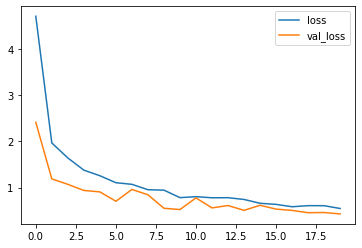

In [101]:
history[['loss','val_loss']].plot()

<AxesSubplot:>

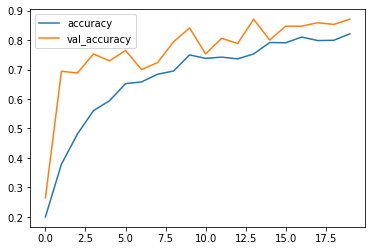

In [102]:
history[['accuracy','val_accuracy']].plot()

In [103]:
model.save('flower_vgg16.h5')